# Performance Analysis (MAF PHASE for now)

Objective : 

- Monitor aerobic efficiency
- Track weekly trends
- Ensure injury-safe progression



## Data Load

In [23]:
import pandas as pd 
import numpy as np

runs = pd.read_csv("../data/processed/runs_labeled.csv")
runs["Activity Date"] = pd.to_datetime(runs["Activity Date"])
runs.head()

,Activity ID,Activity Date,Activity Name,Activity Type,Activity Description,Elapsed Time,Distance,Max Heart Rate,Relative Effort,Commute,...,Total Cycles,Recovery,With Pet,Competition,Long Run,For a Cause,Media,pace_min_per_km,training_phase,maf_zone
0,14608741405,2025-05-27 10:04:02,5k,Run,PERUT AING KERAMM AJGGG\ntumben bat larinya berat,2296,5.03,190.0,123.0,False,...,NaN,NaN,NaN,NaN,NaN,NaN,media/63c95eee-186a-4bec-a5bc-5575f5a297d6.jpg...,6.918500,pre_injury,non_maf
1,14629243874,2025-05-29 09:56:36,3k,Run,"seminggu ga lari, berat bat jing",1356,3.11,187.0,74.0,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.050197,pre_injury,non_maf
2,14661013167,2025-06-01 09:40:08,10K,Run,kasus men,5037,10.05,183.0,248.0,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.659314,pre_injury,non_maf
3,14681393833,2025-06-03 09:58:41,5k,Run,lumayan iyah,2364,5.02,179.0,114.0,False,...,NaN,NaN,NaN,NaN,NaN,NaN,media/0f020806-b0b0-4d3a-a28e-f55787d4cd7c.jpg,7.659314,pre_injury,non_maf
4,14702999166,2025-06-05 10:16:54,Tipis tipis,Run,MAF training,1974,3.20,157.0,32.0,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.162544,pre_injury,maf_pure


In [24]:
runs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Columns: 102 entries, Activity ID to maf_zone
dtypes: bool(1), datetime64[ns](1), float64(90), int64(2), object(8)
memory usage: 57.8+ KB


## Time Features (Weekly Context)

In [25]:
runs["week"] = runs["Activity Date"].dt.to_period("W").astype(str)
runs["weekday"] = runs["Activity Date"].dt.day_name()


## Filter MAF relevant runs

In [26]:
maf_runs = runs[
    runs["maf_zone"].isin(["maf_pure", "maf_tolerated"])                             
].copy()

# WEEKLY MAF PERFORMANCE TREND (CORE)



## Weekly Aggregation

In [27]:
weekly_maf = (
    maf_runs.groupby("week")
    .agg(
        run_count = ("Activity Date", "count"),
        avg_maf_hr = ("Average Heart Rate", "mean"),
        avg_maf_pace = ("pace_min_per_km", "mean"),
        total_minutes = ("Moving Time", lambda x: x.sum()/60)
    )
    .reset_index()
)

In [28]:
weekly_maf.tail()

,week,run_count,avg_maf_hr,avg_maf_pace,total_minutes
19,2025-12-01/2025-12-07,1,161.000000,8.499065,43.866667
20,2025-12-08/2025-12-14,3,153.666667,8.531229,133.466667
21,2025-12-15/2025-12-21,2,153.500000,8.158085,88.850000
22,2025-12-22/2025-12-28,3,154.000000,8.600192,133.733333
23,2025-12-29/2026-01-04,1,147.000000,8.568980,26.233333


## Longrun Analysis (Injury Guard)

In [29]:
# long_runs = maf_runs[
#     (maf_runs["weekday"] == "sunday") &
#     (maf_runs["Distance"] >= 45 * 60) 
# ].copy()

In [30]:
# longrun_weekly = (
#     long_runs.groupby("week")
#     .agg(
#         lr_duration_min = ("Moving Time", lambda x: x.sum()/60),
#         lr_avg_hr = ("Average Heart Rate", "mean"),
#         lr_avg_pace = ("pace_min_per_km", "mean"),

#     )
#     .reset_index()
# )

i forgot that i never choose a type of run in strava so i do this

In [31]:
# identify weekly long run as longest duration run per week
long_runs = (
    maf_runs
    .sort_values("Moving Time", ascending=False)
    .groupby("week")
    .head(1)
    .copy()
)

longrun_weekly = (
    long_runs
    .groupby("week")
    .agg(
        lr_duration_min=("Moving Time", lambda x: x.mean() / 60),
        lr_avg_hr=("Average Heart Rate", "mean"),
        lr_avg_pace=("pace_min_per_km", "mean")
    )
    .reset_index()
)


## Phase Based Performance Check

In [32]:
phase_perf = (
    maf_runs.groupby("training_phase")
    .agg(
        avg_hr = ("Average Heart Rate", "mean"),
        avg_pace = ("pace_min_per_km", "mean"),
        run_count = ("Activity Date", "count"),
        
    )
    .reset_index()
)

In [33]:
weekly_maf["pace_trend"] = weekly_maf["avg_maf_pace"].diff()
weekly_maf["hr_trend"] = weekly_maf["avg_maf_hr"].diff()


In [34]:
weekly_maf[["week", "pace_trend", "hr_trend"]].tail()


,week,pace_trend,hr_trend
19,2025-12-01/2025-12-07,0.440898,3.000000
20,2025-12-08/2025-12-14,0.032164,-7.333333
21,2025-12-15/2025-12-21,-0.373145,-0.166667
22,2025-12-22/2025-12-28,0.442107,0.500000
23,2025-12-29/2026-01-04,-0.031211,-7.000000


# Vizualsss

bring in the graphics libraries peopleee!! :D

## Weekly MAF Trends

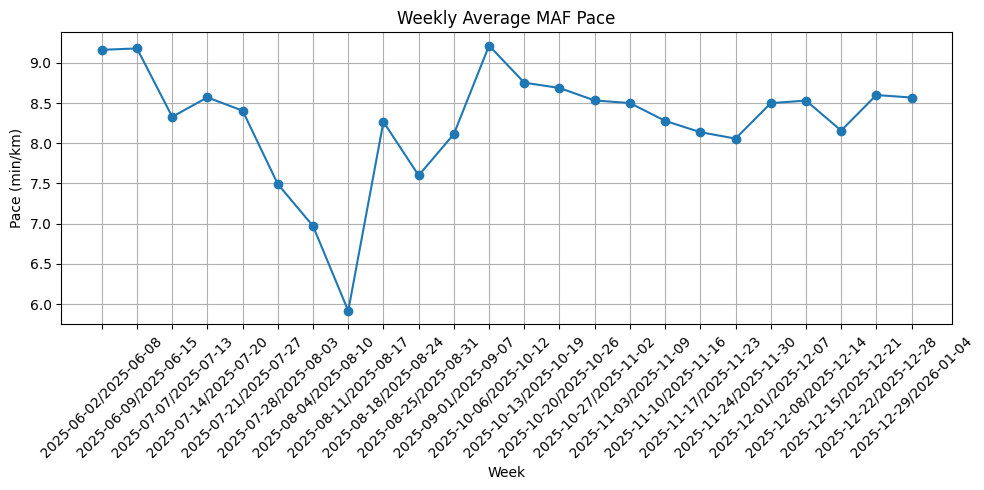

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(
    weekly_maf["week"], 
    weekly_maf["avg_maf_pace"], 
    marker='o', 
    label='Avg MAF Pace (min/km)'
)

plt.title("Weekly Average MAF Pace")
plt.xlabel("Week")
plt.ylabel("Pace (min/km)")
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()

## Weekly MAF HR stability

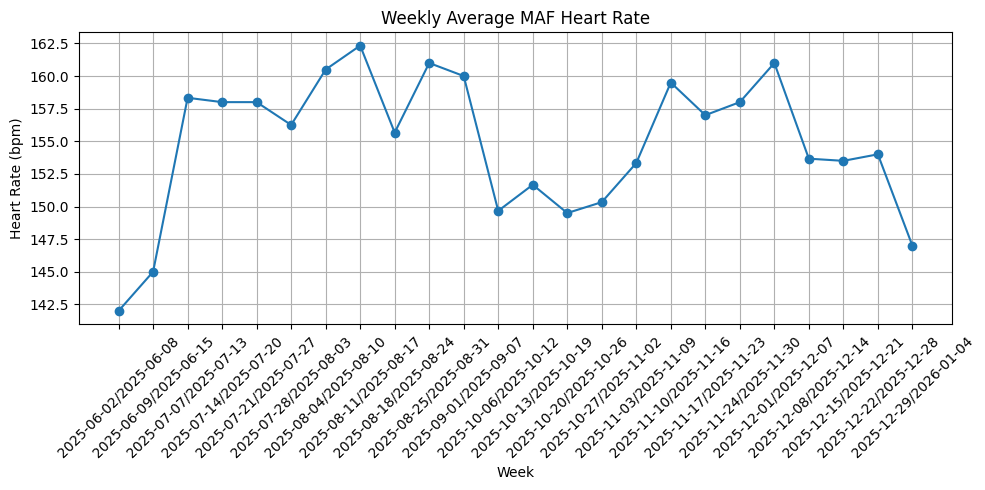

In [36]:
plt.figure(figsize=(10,5))
plt.plot(
    weekly_maf["week"],
    weekly_maf["avg_maf_hr"],
    marker="o"
)

plt.title("Weekly Average MAF Heart Rate")
plt.xlabel("Week")
plt.ylabel("Heart Rate (bpm)")
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()


## Long runs HR vs Duration (injury guard)

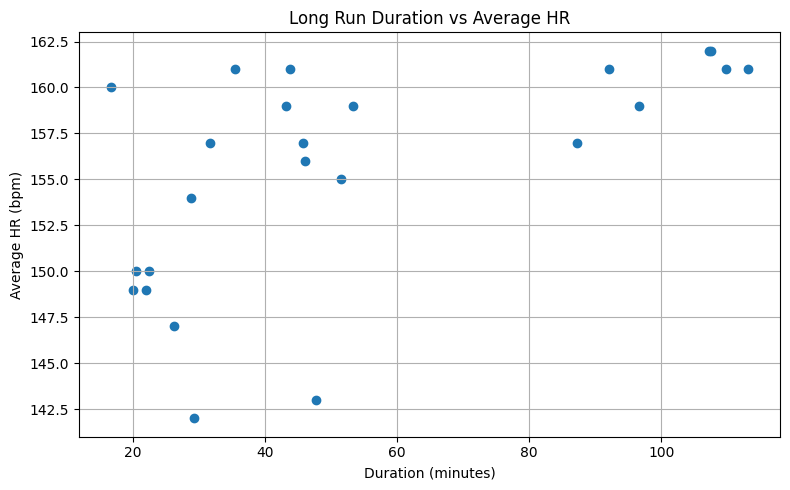

In [37]:
plt.figure(figsize=(8,5))
plt.scatter(
    longrun_weekly["lr_duration_min"],
    longrun_weekly["lr_avg_hr"]
)

plt.title("Long Run Duration vs Average HR")
plt.xlabel("Duration (minutes)")
plt.ylabel("Average HR (bpm)")
plt.grid(True)

plt.tight_layout()
plt.show()


## PACE vs HR (efficiency map)

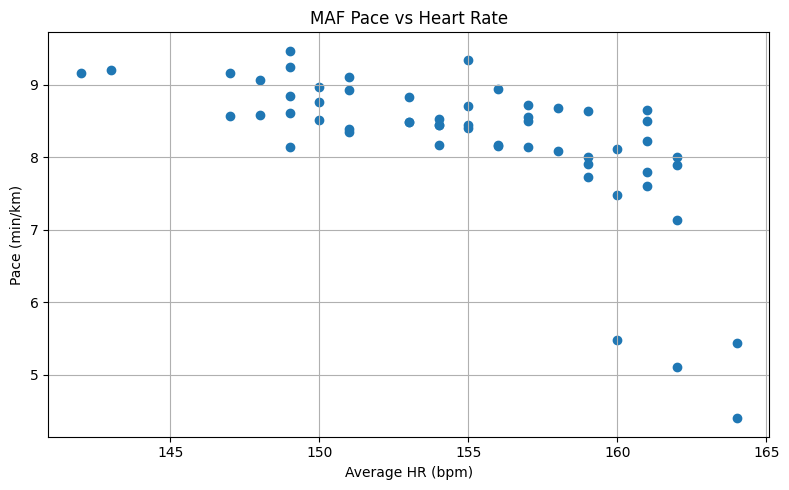

In [38]:
plt.figure(figsize=(8,5))
plt.scatter(
    maf_runs["Average Heart Rate"],
    maf_runs["pace_min_per_km"]
)

plt.title("MAF Pace vs Heart Rate")
plt.xlabel("Average HR (bpm)")
plt.ylabel("Pace (min/km)")
plt.grid(True)

plt.tight_layout()
plt.show()


now that i have the new label, lets just do this all over again


# Perfomance analyst V2


In [39]:
runs2 = pd.read_csv("../data/processed/runs_labeledv2.csv")
runs2["Activity Date"] = pd.to_datetime(runs2["Activity Date"])
runs2.head()

,Activity ID,Activity Date,Activity Name,Activity Type,Activity Description,Elapsed Time,Distance,Max Heart Rate,Relative Effort,Commute,...,Recovery,With Pet,Competition,Long Run,For a Cause,Media,pace_min_per_km,training_phase,maf_zone,maf_band
0,14608741405,2025-05-27 10:04:02,5k,Run,PERUT AING KERAMM AJGGG\ntumben bat larinya berat,2296,5.03,190.0,123.0,False,...,NaN,NaN,NaN,NaN,NaN,media/63c95eee-186a-4bec-a5bc-5575f5a297d6.jpg...,6.918500,pre_injury,non_maf,non_maf
1,14629243874,2025-05-29 09:56:36,3k,Run,"seminggu ga lari, berat bat jing",1356,3.11,187.0,74.0,False,...,NaN,NaN,NaN,NaN,NaN,NaN,7.050197,pre_injury,non_maf,non_maf
2,14661013167,2025-06-01 09:40:08,10K,Run,kasus men,5037,10.05,183.0,248.0,False,...,NaN,NaN,NaN,NaN,NaN,NaN,7.659314,pre_injury,non_maf,non_maf
3,14681393833,2025-06-03 09:58:41,5k,Run,lumayan iyah,2364,5.02,179.0,114.0,False,...,NaN,NaN,NaN,NaN,NaN,media/0f020806-b0b0-4d3a-a28e-f55787d4cd7c.jpg,7.659314,pre_injury,non_maf,non_maf
4,14702999166,2025-06-05 10:16:54,Tipis tipis,Run,MAF training,1974,3.20,157.0,32.0,False,...,NaN,NaN,NaN,NaN,NaN,NaN,9.162544,pre_injury,maf_pure,maf_clean


In [40]:
runs2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Columns: 103 entries, Activity ID to maf_band
dtypes: bool(1), datetime64[ns](1), float64(90), int64(2), object(9)
memory usage: 58.4+ KB


## Weekly context time features

In [41]:
runs2["week"] = runs2["Activity Date"].dt.to_period("W").astype(str)
runs2["weekday"] = runs2["Activity Date"].dt.day_name()

## Filter MAF runs

In [42]:
maf_band = runs2[
    runs2["maf_zone"].isin(["maf_pure", "maf_tolerated"])                             
].copy()

# WEEKLY MAF PERFORMANCE TREND (CORE)

## Weekly Aggregation

In [43]:
weekly_maf2 = (
    maf_band.groupby("week")
    .agg(
        run_count = ("Activity Date", "count"),
        avg_maf_hr = ("Average Heart Rate", "mean"),
        avg_maf_pace = ("pace_min_per_km", "mean"),
        total_minutes = ("Moving Time", lambda x: x.sum()/60)
    )
    .reset_index()
)

In [44]:
weekly_maf2.tail()

,week,run_count,avg_maf_hr,avg_maf_pace,total_minutes
19,2025-12-01/2025-12-07,1,161.000000,8.499065,43.866667
20,2025-12-08/2025-12-14,3,153.666667,8.531229,133.466667
21,2025-12-15/2025-12-21,2,153.500000,8.158085,88.850000
22,2025-12-22/2025-12-28,3,154.000000,8.600192,133.733333
23,2025-12-29/2026-01-04,1,147.000000,8.568980,26.233333


## Longrun analysis

In [45]:
# identify weekly long run as longest duration run per week
long_runs2 = (
    maf_band
    .sort_values("Moving Time", ascending=False)
    .groupby("week")
    .head(1)
    .copy()
)

longrun_weekly2 = (
    long_runs2
    .groupby("week")
    .agg(
        lr_duration_min=("Moving Time", lambda x: x.mean() / 60),
        lr_avg_hr=("Average Heart Rate", "mean"),
        lr_avg_pace=("pace_min_per_km", "mean")
    )
    .reset_index()
)

## Phase based performance check

In [46]:
phase_perf2 = (
    maf_band.groupby("training_phase")
    .agg(
        avg_hr = ("Average Heart Rate", "mean"),
        avg_pace = ("pace_min_per_km", "mean"),
        run_count = ("Activity Date", "count"),
        
    )
    .reset_index()
)

In [47]:
weekly_maf2["pace_trend"] = weekly_maf2["avg_maf_pace"].diff()
weekly_maf2["hr_trend"] = weekly_maf2["avg_maf_hr"].diff()

In [48]:
weekly_maf2[["week", "pace_trend", "hr_trend"]].tail()

,week,pace_trend,hr_trend
19,2025-12-01/2025-12-07,0.440898,3.000000
20,2025-12-08/2025-12-14,0.032164,-7.333333
21,2025-12-15/2025-12-21,-0.373145,-0.166667
22,2025-12-22/2025-12-28,0.442107,0.500000
23,2025-12-29/2026-01-04,-0.031211,-7.000000


# VIZUALZZZ AGAIN

## Weekly maf trends v2

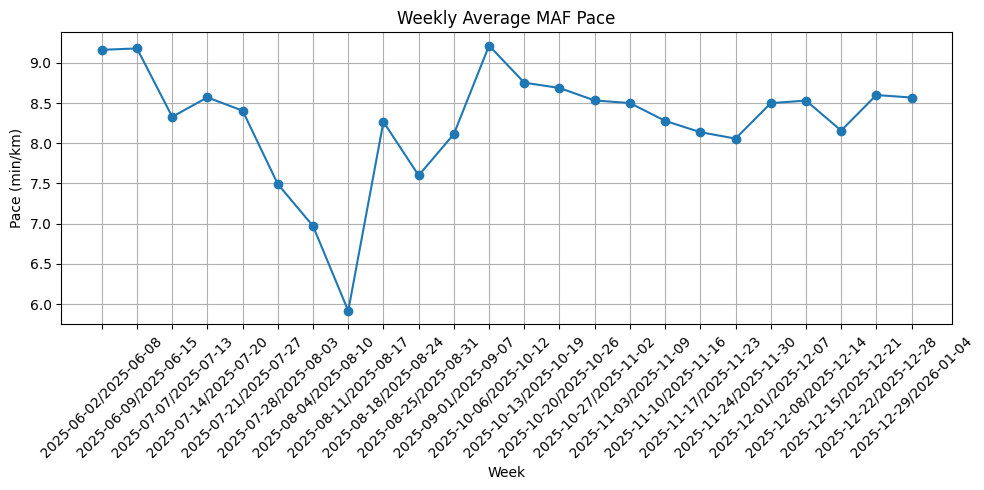

In [49]:
plt.figure(figsize=(10,5))
plt.plot(
    weekly_maf2["week"], 
    weekly_maf2["avg_maf_pace"], 
    marker='o', 
    label='Avg MAF Pace (min/km)'
)

plt.title("Weekly Average MAF Pace")
plt.xlabel("Week")
plt.ylabel("Pace (min/km)")
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()

## Weekly MAF HR stability v2

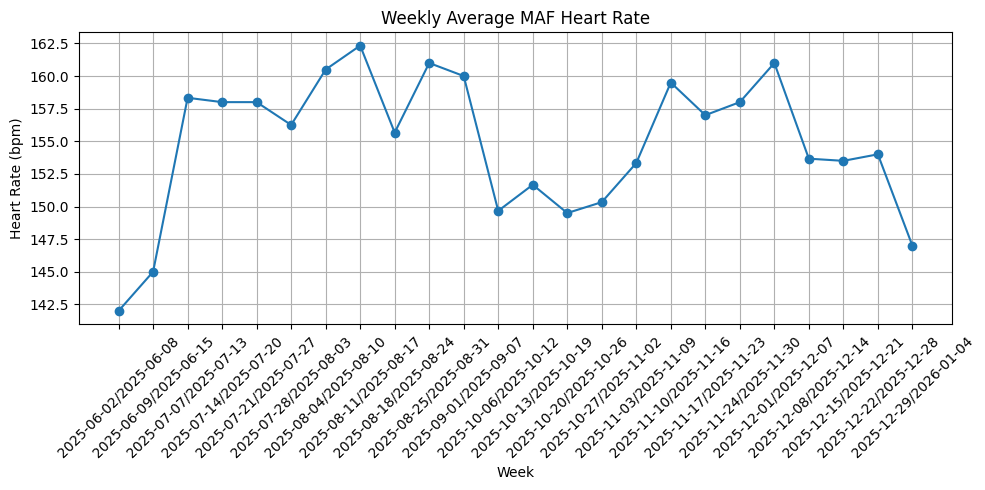

In [50]:
plt.figure(figsize=(10,5))
plt.plot(
    weekly_maf2["week"],
    weekly_maf2["avg_maf_hr"],
    marker="o"
)

plt.title("Weekly Average MAF Heart Rate")
plt.xlabel("Week")
plt.ylabel("Heart Rate (bpm)")
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()

## Long runs HR vs Duration (injury guard) v2

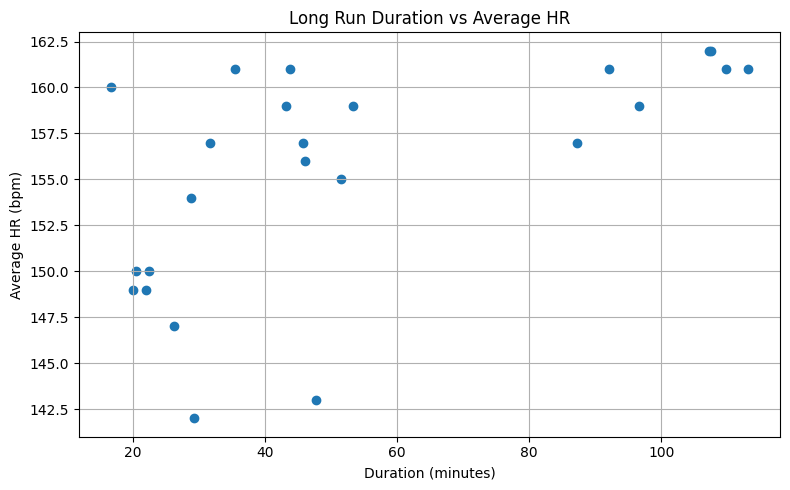

In [51]:
plt.figure(figsize=(8,5))
plt.scatter(
    longrun_weekly2["lr_duration_min"],
    longrun_weekly2["lr_avg_hr"]
)

plt.title("Long Run Duration vs Average HR")
plt.xlabel("Duration (minutes)")
plt.ylabel("Average HR (bpm)")
plt.grid(True)

plt.tight_layout()
plt.show()


PACE vs HR v2 (rematched :D hehehe)

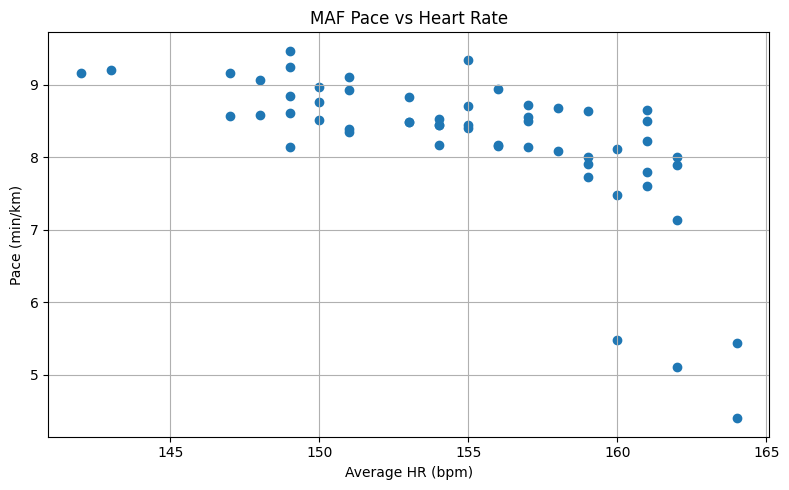

In [52]:
plt.figure(figsize=(8,5))
plt.scatter(
    maf_band["Average Heart Rate"],
    maf_band["pace_min_per_km"]
)

plt.title("MAF Pace vs Heart Rate")
plt.xlabel("Average HR (bpm)")
plt.ylabel("Pace (min/km)")
plt.grid(True)

plt.tight_layout()
plt.show()


# Insight 

- HR vs Pace 
can say that it is stable, its also show that im actually going faster that means my aerobic is getting good (now i need to focus on bunch of excersice for leg day).
- HR Drift 
there is some drift in the HR for sure, due to external factor like weather and many more (yes i am making living in indonesia as an excuse for being slow its just hot all the tiime man sorry).
- no upward significance in the trend 
this is the part where i need to be more patience maybe because this trend is coming like a long later time maybe. hopefully its not to fast that my muscle wont handle.


im also going to do this 

IF maf_tolerated > 40% for 2 weeks:
    hold volume

IF long run HR drift < 5 bpm:
    eligible to increase duration

IF HR stable but pace flat:
    base still building (do nothing)


but later.